In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
missing_values = ['NA','na','--','?','-','None','none','non','nil','NaN']
dfo = pd.read_excel('./datos/diabetes_py.xlsx',sheet_name='diabetes_python.xlsx', na_values=missing_values, encoding = "ISO-8859-1")
#dfo = pd.read_csv('diabetes_python.csv', na_values=missing_values, encoding = "ISO-8859-1", sep=';') 
#bu = pd.read_excel('./datos/diabetes_py.xlsx')
print('dfo Shape:',dfo.shape)
#dfo.head()
dfo.head(3)
#dfo.columns

dfo Shape: (115, 4)


,clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199


## Data select

In [4]:
dfo.columns

Index(['clase', 'glucosa', 'insulina', 'sspg'], dtype='object')

In [6]:
cols = ['clase', 'glucosa', 'insulina', 'sspg']

df = dfo[cols]

print('df shape:',df.shape)
df.head()

df shape: (115, 4)


,clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199
3,1,90,323,240
4,1,86,381,157


## Limpieza

In [7]:
# Controlando valores nulos
df.isnull().any().any()

False

In [8]:
#porcentaje de valores null por columna
(df.isnull().sum() / len(df))*100

clase       0.0
glucosa     0.0
insulina    0.0
sspg        0.0
dtype: float64

In [9]:
#Eliminar los valores nulos
df_2 = df.dropna()
print('df shape:',df.shape)
print('df_2 shape:',df_2.shape)

df shape: (115, 4)
df_2 shape: (115, 4)


In [10]:
#porcentaje de valores null por columna
(df_2.isnull().sum() / len(df_2))*100

clase       0.0
glucosa     0.0
insulina    0.0
sspg        0.0
dtype: float64

In [11]:
pd.value_counts(df_2['clase'], sort = True) 
### clase 1 = normal
### clase 2 = pre-diabetico
### clase 3 = diabetico

1    66
2    26
3    23
Name: clase, dtype: int64

## Transformación

In [12]:
print('df_2 shape:',df_2.shape)
print(pd.value_counts(df_2['clase'], sort = True))

df_2 shape: (115, 4)
1    66
2    26
3    23
Name: clase, dtype: int64


## Observar las relaciones mediante una matriz de correlaciones


In [14]:
df_2.corr()['clase'].sort_values(ascending=False)

clase       1.000000
insulina    0.833399
glucosa     0.728553
sspg       -0.052124
Name: clase, dtype: float64

In [15]:
cols_f = ['clase', 'glucosa', 'insulina']
df_2[cols_f].corr()['clase'].sort_values(ascending=False)

clase       1.000000
insulina    0.833399
glucosa     0.728553
Name: clase, dtype: float64

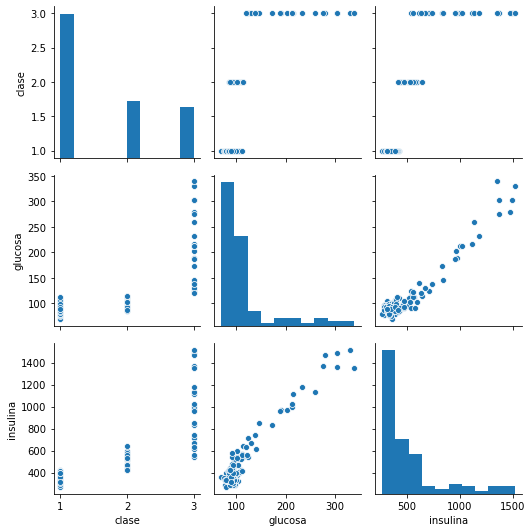

In [16]:
sns.pairplot(df_2[cols_f], height=2.5)
plt.tight_layout()
# plt.savefig('imagenes/10_03.png', dpi=300)
plt.show()

In [17]:
df_2[cols_f]

,clase,glucosa,insulina
0,1,97,289
1,1,105,319
2,1,90,356
3,1,90,323
4,1,86,381
...,...,...,...
110,3,120,636
111,3,138,741
112,3,188,958
113,3,339,1354


In [18]:
cols_fea = ['glucosa', 'insulina']

## Separar la data de ajuste y test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_2[cols_fea].values

array([[  97,  289],
       [ 105,  319],
       [  90,  356],
       [  90,  323],
       [  86,  381],
       [ 100,  350],
       [  85,  301],
       [  97,  379],
       [  97,  296],
       [  91,  353],
       [  87,  306],
       [  78,  290],
       [  90,  371],
       [  80,  393],
       [  90,  364],
       [  99,  359],
       [  85,  296],
       [  90,  345],
       [  90,  378],
       [  88,  304],
       [  90,  327],
       [  92,  386],
       [  98,  365],
       [ 100,  352],
       [  86,  325],
       [  98,  321],
       [  70,  360],
       [  99,  336],
       [  75,  352],
       [  90,  353],
       [  85,  373],
       [  99,  376],
       [ 100,  367],
       [  78,  335],
       [ 106,  396],
       [ 102,  378],
       [  90,  360],
       [  94,  291],
       [  80,  269],
       [  93,  318],
       [  96,  356],
       [  88,  291],
       [  94,  313],
       [  93,  306],
       [  86,  319],
       [  96,  332],
       [  86,  323],
       [  89,

In [21]:
df_2[cols_f]['clase'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

In [22]:
X = df_2[cols_fea].values #df_4[cols_fea].iloc[:, :-1].values
y = df_2[cols_f]['clase'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
X_test

array([[  87,  306],
       [ 112,  568],
       [  90,  356],
       [ 110,  426],
       [  97,  379],
       [ 102,  599],
       [ 103,  533],
       [  88,  423],
       [ 213, 1001],
       [ 112,  414],
       [  85,  373],
       [  90,  356],
       [ 125,  714],
       [  98,  365],
       [  93,  306],
       [ 330, 1520],
       [  86,  325],
       [ 101,  469],
       [  93,  376],
       [  95,  391],
       [  85,  296],
       [  80,  393],
       [  70,  360]])

In [27]:
y_test

array([1, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1,
       1])

## Modelado

In [28]:
from numpy import array
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#pip install xgboost

In [29]:
#Se crea la lista "models" la cual contendra los algoritmos de machine learning para la construcción del modelo:
#El algoritmo 'LRN' el cual es 'LogisticRegression' que representa 'Regresión Logística',
#El algoritmo 'LDA' el cual es 'LinearDiscriminantAnalysis' que representa 'Análisis Discriminante',
#El algoritmo 'SVM' el cual es 'SVC' que representa 'Máquina de soporte de vectores',
#El algoritmo 'SGD' el cual es 'SGDClassifier' que representa 'Pendiente de Gradiente Estocástico',
#El algoritmo 'KNN' el cual es 'KNeighborsClassifier' que representa 'Vecinos más Cercanos',
#El algoritmo 'GNB' el cual es 'GaussianNB' que representa 'Clasificador Bayesiano Ingenuo',
#El algoritmo 'DTS' el cual es 'DecisionTreeClassifier' que representa 'Árbol de Decisión',
#El algoritmo 'RFS' el cual es 'RandomForestClassifier' que representa 'Bosques Aleatorios',
#El algoritmo 'NNM' el cual es 'MLPClassifier' que representa 'Redes Neuronales' y
#El algoritmo 'XGB' el cual es 'XGBClassifier' que representa 'Potenciador del Gradiente Extremo',
models = []
models.append(('LRN', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('DTS', DecisionTreeClassifier()))
models.append(('RFS', RandomForestClassifier()))
models.append(('NNM', MLPClassifier()))
models.append(('XGB', XGBClassifier()))

#Se crea una lista "result" que almacenara los resultados de la validación cruzada
results = []

#Se crea una lista "names" que almacenara los nombres de los algoritmos de machine learning
names = []

#Se ejecuta el ciclo 'for' con todos los algoritmos de machine learning elegidos:
#Repete y calcula la media aritmética de las medidas de evaluación de las diferentes particiones
#Proceso de validación cruzada con 10 interacciones de los datos de entrenamiento
#Se divide en 10 partes, entrena en 9, valida en 1 y repite el proceso 10 veces
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

LRN: 0.958889 (0.067412)
LDA: 0.903333 (0.074378)
SVM: 0.882222 (0.085085)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SGD: 0.528889 (0.171428)
KNN: 0.955556 (0.073703)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GNB: 0.925556 (0.091631)
DTS: 1.000000 (0.000000)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RFS: 1.000000 (0.000000)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-package

NNM: 0.456667 (0.278286)
XGB: 1.000000 (0.000000)


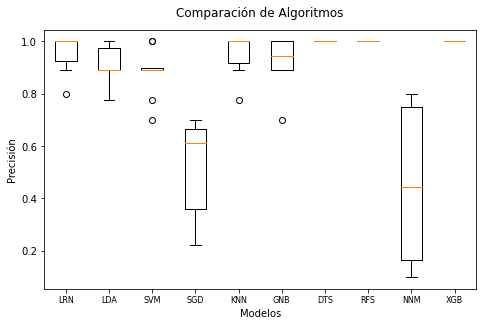

In [30]:
#Se crea el diagrama de caja y bigotes con los resultados de evaluación de los modelos para 
#Comparar la Distribución y Precisión media para cada modelo
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
fig.subplots_adjust(left=0.00, right=1.0, top=0.9, bottom=0.0)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=0, fontsize=8)
ax.set_xlabel('Modelos')
ax.set_ylabel('Precisión')
plt.show()

In [31]:
print('model:',names[9])
results[9]

model: XGB


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
print('model:',names[6])
results[6]

model: DTS


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
#Se escoge el mejor modelo predictivo
DTS = DecisionTreeClassifier()
#Se entrena el modelo escogido
DTS.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
#Se realiza las predicciones con los datos del array de prueba 'X_test'
predictionsDTS = DTS.predict(X_test)
#Puntaje de clasificación de precisión
print(accuracy_score(y_test, predictionsDTS))

#Matriz de confusión
print(confusion_matrix(y_test, predictionsDTS))

#Reporte de clasificación
print(classification_report(y_test, predictionsDTS))

0.9565217391304348
[[14  1  0]
 [ 0  5  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.96        23
   macro avg       0.94      0.98      0.96        23
weighted avg       0.96      0.96      0.96        23



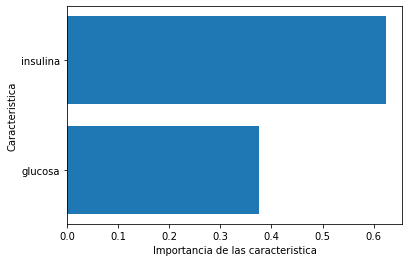

In [36]:
feature_names= cols_fea
caract=X_test.shape[1]
plt.barh(range(caract), DTS.feature_importances_)
plt.yticks(np.arange(caract), feature_names)
plt.xlabel("Importancia de las caracteristica")
plt.ylabel("Caracteristica")
plt.show()

In [37]:
res1 = pd.DataFrame(data=[feature_names, DTS.feature_importances_])
res1.transpose().sort_values(by=1, ascending=False)

,0,1
1,insulina,0.624676
0,glucosa,0.375324


## Manejo de clases desbalanceadas con la librería Python ImbLearn
No olvides instalar con:

pip install -U imbalanced-learn

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Normal","Fraud"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

%matplotlib inline

In [39]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

In [44]:
class_labels = np.unique(df_2[cols_f]['clase'])
print('class labels', class_labels) 
feature_names= cols_fea
feature_names

class labels [1 2 3]


['glucosa', 'insulina']

In [45]:
df_5 = df_2[cols_f]
print('df_5 shape:',df_5.shape)
pd.value_counts(df_5['clase'], sort = True) 

df_5 shape: (115, 3)


1    66
2    26
3    23
Name: clase, dtype: int64

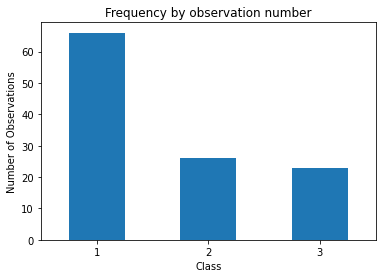

In [46]:
#if you don't have an intuitive sense of how imbalanced these two classes are, let's go visual
count_classes = pd.value_counts(df_5['clase'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
#plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

## Estrategia: Subsampling en la clase mayoritaria

In [47]:
us = NearMiss(n_neighbors=3, version=2) #ratio=0.5, , random_state=1


In [48]:
X_train_res, y_train_res = us.fit_sample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({1: 51, 2: 21, 3: 20})
Distribution after resampling Counter({1: 20, 2: 20, 3: 20})


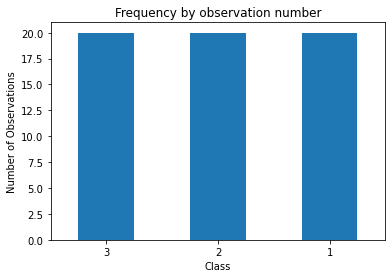

In [49]:
#if you don't have an intuitive sense of how imbalanced these two classes are, let's go visual
count_classes = pd.value_counts(y_train_res, sort = True)
count_classes.plot(kind = 'bar', rot=0)
#plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [50]:
#Se re-entrena el modelo escogido
DTS2 = DecisionTreeClassifier()
DTS2.fit(X_train_res, y_train_res)
#Se realiza las predicciones con los datos del array de prueba 'X_test'
predictionsDTS2 = DTS2.predict(X_test)
#Puntaje de clasificación de precisión
print(accuracy_score(y_test, predictionsDTS2))

#Matriz de confusión
print(confusion_matrix(y_test, predictionsDTS2))

#Reporte de clasificación
print(classification_report(y_test, predictionsDTS2))

0.9565217391304348
[[14  1  0]
 [ 0  5  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.96        23
   macro avg       0.94      0.98      0.96        23
weighted avg       0.96      0.96      0.96        23



## Estrategia: Oversampling de la clase minoritaria

In [51]:
os =  RandomOverSampler() #ratio=0.5
X_train_res, y_train_res = os.fit_sample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({1: 51, 2: 21, 3: 20})
Distribution labels after resampling Counter({2: 51, 3: 51, 1: 51})


In [52]:
#Se re-entrena el modelo escogido
DTS2 = DecisionTreeClassifier()
DTS2.fit(X_train_res, y_train_res)
#Se realiza las predicciones con los datos del array de prueba 'X_test'
predictionsDTS2 = DTS2.predict(X_test)
#Puntaje de clasificación de precisión
print(accuracy_score(y_test, predictionsDTS2))

#Matriz de confusión
print(confusion_matrix(y_test, predictionsDTS2))

#Reporte de clasificación
print(classification_report(y_test, predictionsDTS2))

0.9565217391304348
[[14  1  0]
 [ 0  5  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.96        23
   macro avg       0.94      0.98      0.96        23
weighted avg       0.96      0.96      0.96        23



## Estrategia: Combinamos resampling con Smote-Tomek

Ahora probaremos una técnica muy usada que consiste en aplicar en simultáneo un algoritmo de subsampling y otro de oversampling a la vez al dataset. En este caso usaremos SMOTE para oversampling: busca puntos vecinos cercanos y agrega puntos “en linea recta” entre ellos. Y usaremos Tomek para undersampling que quita los de distinta clase que sean nearest neighbor y deja ver mejor el decisión boundary (la zona limítrofe de nuestras clases).

In [53]:
os_us = SMOTETomek()#ratio=0.5
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({1: 51, 2: 21, 3: 20})
Distribution after resampling Counter({2: 51, 3: 51, 1: 51})


In [54]:
#Se re-entrena el modelo escogido
DTS2 = DecisionTreeClassifier()
DTS2.fit(X_train_res, y_train_res)
#Se realiza las predicciones con los datos del array de prueba 'X_test'
predictionsDTS2 = DTS2.predict(X_test)
#Puntaje de clasificación de precisión
print(accuracy_score(y_test, predictionsDTS2))

#Matriz de confusión
print(confusion_matrix(y_test, predictionsDTS2))

#Reporte de clasificación
print(classification_report(y_test, predictionsDTS2))

0.9565217391304348
[[14  1  0]
 [ 0  5  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.96        23
   macro avg       0.94      0.98      0.96        23
weighted avg       0.96      0.96      0.96        23



## Estrategia: Ensamble de Modelos con Balanceo

Para esta estrategia usaremos un Clasificador de Ensamble que utiliza Bagging y el modelo será un DecisionTree. Veamos como se comporta:

In [55]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train, y_train)
pred_y = bbc.predict(X_test)

In [56]:
#Puntaje de clasificación de precisión
print(accuracy_score(y_test, pred_y))

#Matriz de confusión
print(confusion_matrix(y_test, pred_y))

#Reporte de clasificación
print(classification_report(y_test, pred_y))

0.9565217391304348
[[14  1  0]
 [ 0  5  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.96        23
   macro avg       0.94      0.98      0.96        23
weighted avg       0.96      0.96      0.96        23



## Resultados de las Estrategias


Estrategia ganadora es: Todas

In [57]:
#Estrategia ganadora es: Oversampling de la clase minoritaria
os =  RandomOverSampler() #ratio=0.5
X_train_res, y_train_res = os.fit_sample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({1: 51, 2: 21, 3: 20})
Distribution labels after resampling Counter({2: 51, 3: 51, 1: 51})


In [58]:
#Se re-entrena el modelo escogido
DTS2 = DecisionTreeClassifier()
DTS2.fit(X_train_res, y_train_res)
#Se realiza las predicciones con los datos del array de prueba 'X_test'
predictionsDTS2 = DTS2.predict(X_test)
#Puntaje de clasificación de precisión
print(accuracy_score(y_test, predictionsDTS2))

#Matriz de confusión
print(confusion_matrix(y_test, predictionsDTS2))

#Reporte de clasificación
print(classification_report(y_test, predictionsDTS2))

0.9565217391304348
[[14  1  0]
 [ 0  5  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.96        23
   macro avg       0.94      0.98      0.96        23
weighted avg       0.96      0.96      0.96        23



In [59]:
from joblib import dump
dump(DTS2, 'DTS.joblib') 

['DTS.joblib']

In [60]:
from joblib import load
DTSf = load('DTS.joblib') 

In [63]:
X_test

array([[  87,  306],
       [ 112,  568],
       [  90,  356],
       [ 110,  426],
       [  97,  379],
       [ 102,  599],
       [ 103,  533],
       [  88,  423],
       [ 213, 1001],
       [ 112,  414],
       [  85,  373],
       [  90,  356],
       [ 125,  714],
       [  98,  365],
       [  93,  306],
       [ 330, 1520],
       [  86,  325],
       [ 101,  469],
       [  93,  376],
       [  95,  391],
       [  85,  296],
       [  80,  393],
       [  70,  360]])

In [61]:
y_test

array([1, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1,
       1])

In [62]:
#Se realiza las predicciones con los datos del array de prueba 'X_test'
predictions2 = DTSf.predict(X_test)
predictions2

array([1, 2, 1, 2, 1, 2, 2, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1,
       1])

In [70]:
pred_y1 = DTSf.predict([[  213,  850],]) # glucosa, insulina
pred_y1

array([3])

In [64]:
#Puntaje de clasificación de precisión
print(accuracy_score(y_test, predictions2))

#Matriz de confusión
print(confusion_matrix(y_test, predictions2))

#Reporte de clasificación
print(classification_report(y_test, predictions2))

0.9565217391304348
[[14  1  0]
 [ 0  5  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.96        23
   macro avg       0.94      0.98      0.96        23
weighted avg       0.96      0.96      0.96        23



In [71]:
kfold = KFold(n_splits=10, random_state=7)
cv_results = cross_val_score(DTSf, X_train_res, y_train_res, cv=kfold, scoring='accuracy')
cv_results

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

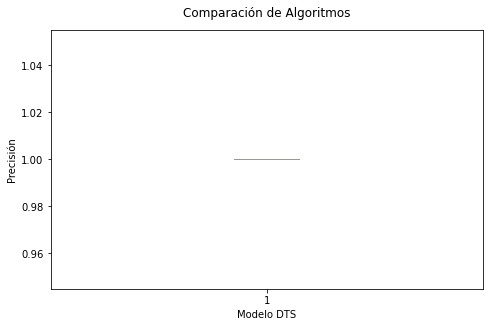

In [72]:
#Se crea el diagrama de caja y bigotes con los resultados de evaluación de
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
fig.subplots_adjust(left=0.00, right=1.0, top=0.9, bottom=0.0)
ax = fig.add_subplot(111)
plt.boxplot(cv_results)
#ax.set_xticklabels('DTS', rotation=0, fontsize=8)
ax.set_xlabel('Modelo DTS')
ax.set_ylabel('Precisión')
plt.show()

CURVE ROC

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [75]:
def PuntodeCorte(model,X_cv,y_cv):
    probs = model.predict_proba(X_cv)
    prob = probs[:,1]
    prob_df = pd.DataFrame(prob)
    threshold = 0.5
    prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
# #   prob_df.head()
#    auc = roc_auc_score(y_cv, prob_df.prediction)
#    print('AUC: %.2f' % auc)
# #   fpr, tpr, thresholds = roc_curve(y_cv, prob)
# #   plot_roc_curve(fpr, tpr)
    return prob_df

In [87]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [77]:
from sklearn.model_selection import StratifiedKFold
import itertools
def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    print('')

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
skf = StratifiedKFold(n_splits=2)

In [78]:
# Learning Curve
from sklearn.model_selection import learning_curve,ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='balanced_accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [89]:
# Generate Curve ROC TEST
prob_df=PuntodeCorte(DTSf,X_test,y_test)

#auc = roc_auc_score(y_test, prob_df.prediction)




# GridResearchCV Arboles de Desicion


In [90]:
##Arbol de Desicion
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN
print(__doc__)
 
# Set the parameters by cross-validation
tuned_parameters = [{"max_depth": range(1,16), "random_state":[7],'min_samples_split' : range(10,500,20)}                   ]

scores = ['balanced_accuracy']  
skf = StratifiedKFold(n_splits=2)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(DecisionTreeClassifier(),tuned_parameters, cv=skf,
                       scoring=  score)
    clf.fit(X_train_res, y_train_res)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for balanced_accuracy

Best parameters set found on development set:

{'max_depth': 2, 'min_samples_split': 10, 'random_state': 7}

Grid scores on development set:

0.653 (+/-0.027) for {'max_depth': 1, 'min_samples_split': 10, 'random_state': 7}
0.653 (+/-0.027) for {'max_depth': 1, 'min_samples_split': 30, 'random_state': 7}
0.653 (+/-0.027) for {'max_depth': 1, 'min_samples_split': 50, 'random_state': 7}
0.653 (+/-0.027) for {'max_depth': 1, 'min_samples_split': 70, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 90, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 110, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 130, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 150, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 170, 'random_state': 7}
0.

0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 250, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 270, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 290, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 310, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 330, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 350, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 370, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 390, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 410, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 430, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 450, 'random_state': 7}
0.333 (+/-0.000) for {'max_depth': 9, 'min_samples_split': 470, 'random_state': 7}
0.33

# Por lo tanto nos quedamos con el modelo anterior
from joblib import load
DTSf = load('DTS.joblib') 

In [92]:
import sklearn
print( sklearn.__version__)

0.23.1
